In [16]:
from pyspark.sql import SparkSession
import os
import matplotlib.pyplot as plt


In [2]:
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.0,io.delta:delta-core_2.12:2.0.1 pyspark-shell'
spark = SparkSession \
            .builder \
            .appName("water_test") \
            .config("spark.sql.extensions","io.delta.sql.DeltaSparkSessionExtension") \
            .config("spark.sql.catalog.spark_catalog","org.apache.spark.sql.delta.catalog.DeltaCatalog") \
            .master("local[*]") \
            .getOrCreate()

# Check LT & SE refine data

In [50]:
se_data = spark.read.format('parquet').load('/home/jovyan/dags/output/raw/refine_se_chlorophyll')


In [51]:
pd_sdata = se_data.filter("waterBodyName == 'ÖSTRA RINGSJÖN'").select('phenomenonTimeSamplingDate','resultObservedValue').orderBy('phenomenonTimeSamplingDate').toPandas()

In [52]:
se_pand_df = se_data.toPandas()

In [53]:
pd_sdata = pd_sdata.set_index('phenomenonTimeSamplingDate')

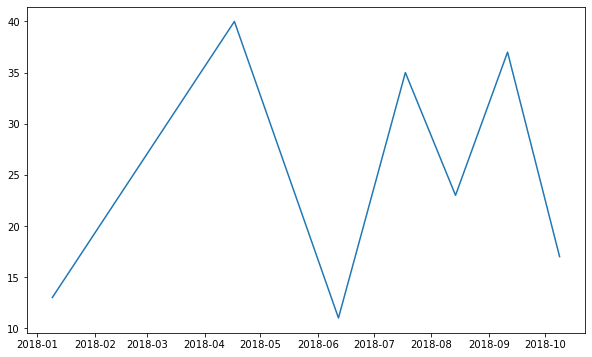

In [55]:
plt.figure(figsize=(10,6))
plt.plot(pd_sdata.index, pd_sdata['resultObservedValue'])

In [37]:
se_pand_df.head(7)

,monitoringSiteIdentifier,parameterWaterBodyCategory,observedPropertyDeterminandCode,observedPropertyDeterminandLabel,procedureAnalysedMatrix,resultUom,sampleIdentifier,resultObservedValue,resultQualityObservedValueBelowLOQ,procedureLOQValue,...,resultExtractableLipid,resultLipid,resultObservationStatus,Remarks,countryCode,monitoringSiteIdentifierScheme,rbdName,waterBodyName,lat,lon
phenomenonTimeSamplingDate,,,,,,,,,,,,,,,,,,,,,
20150817,SE616397-135001,RW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,120.0,0,None,...,NaN,NaN,A,"""Analytical method: SS 028146:1980 (Swedish st...",SE,eionetMonitoringSiteCode,SOUTH BALTIC SEA (SWEDEN),HÖJE Å: ÖNNERUPSBÄCKEN-KÄLLA,55.58212,13.42675
20180822,SE638665-129243,RW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,14.0,0,0.5,...,NaN,NaN,A,Analytical methos: SS 02 81 46 (actone),SE,eionetMonitoringSiteCode,SKAGERRAK AND KATTEGAT (SWEDEN),SUNDSTORPSÅN - MELLAN ST ÖRESJÖN OCH L ÖRESJÖN...,57.55727,12.33679
20180822,SE615375-137087,LW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,160.0,0,0.5,...,NaN,NaN,A,Analytical methos: SS 02 81 46 (actone),SE,euMonitoringSiteCode,SOUTH BALTIC SEA (SWEDEN),KRAGEHOLMSSJÖN,55.4963,13.76197
20180820,SE672729-138082,RW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,16.0,0,0.5,...,NaN,NaN,A,Analytical methos: SS 02 81 46 (actone),SE,eionetMonitoringSiteCode,SKAGERRAK AND KATTEGAT (SWEDEN),ÅROSÄLVEN,60.64505,13.62646
20180820,SE646293-126302,LW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,11.0,0,0.5,...,NaN,NaN,A,Analytical methos: SS 02 81 46 (actone),SE,eionetMonitoringSiteCode,SKAGERRAK AND KATTEGAT (SWEDEN),GRANVATTNET,58.22605,11.77069
20180823,SE617797-135339,LW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,12.0,0,0.5,...,NaN,NaN,A,Analytical methos: SS 02 81 46 (actone),SE,euMonitoringSiteCode,SOUTH BALTIC SEA (SWEDEN),KRANKESJÖN,55.70874,13.47275
20180823,SE633738-142203,LW,EEA_3164-01-0,Chlorophyll a,W,ug/L,NA,12.0,0,0.5,...,NaN,NaN,A,Analytical methos: SS 02 81 46 (actone),SE,eionetMonitoringSiteCode,SOUTH BALTIC SEA (SWEDEN),STORA SKARSJON,57.15589,14.51681


In [48]:
from pyspark.sql.functions import expr
f = "to_date(cast(phenomenonTimeSamplingDate as string),'yyyyMMdd')"

In [49]:
se_data.withColumn("test",expr(f)).show(1,False, True)

-RECORD 0--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 monitoringSiteIdentifier           | SE616397-135001                                                                                                                                          
 parameterWaterBodyCategory         | RW                                                                                                                                                       
 observedPropertyDeterminandCode    | EEA_3164-01-0                                                                                                                                            
 observedPropertyDeterminandLabel   | Chlorophyll a                                                                                                                                            
 procedureAnalysedMatrix            | W 

In [56]:
test = se_data.filter("waterBodyName == 'ÖSTRA RINGSJÖN'").select('phenomenonTimeSamplingDate','resultObservedValue').orderBy('phenomenonTimeSamplingDate')